In [72]:
import cv2
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt

In [77]:
im = cv2.imread("flor.jpg")/255


In [78]:
def histograma(im):
    
    h = np.array([np.count_nonzero(np.uint8(im*255) == pix ) for pix in range(256)], dtype = np.float64)
    h /= sum(h)
    
    return h


In [91]:
# ecualización histograma

def ecualiza(im_or):
    im = im_or.copy()
    
    h = histograma(im)
    dist = np.cumsum(h) # distribución acumulada

    for row in range(im.shape[0]):
        for col in range(im.shape[1]):
            im[row][col] = dist[int(np.round(im[row][col]*255))]

    return im

In [94]:
def ecualiza_(im_or):
    im = im_or.copy()

    h = histograma(im)
    dist = np.cumsum(h) # distribución acumulada  

    for gris in range(256):

        whereis = np.where(np.round(im_or * 255)==gris)
        im[whereis] = dist[gris]
    return im

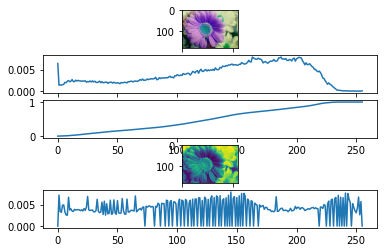

In [87]:
plt.subplot(511)
plt.imshow(im)

h = histograma(im)

plt.subplot(512)
plt.plot(h)

im_e, dist = ecualiza(im[...,1])

plt.subplot(513)
plt.plot(dist)

plt.subplot(514)
plt.imshow(im_e)


# histograma equalitzat
heq = histograma(im_e)
plt.subplot(515)
plt.plot(heq)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


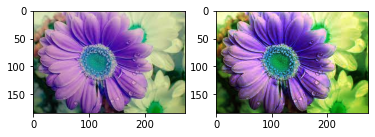

In [95]:


colorines = np.stack((ecualiza_(im[...,0]), ecualiza_(im[...,1]), ecualiza_(im[...,2])), axis = 2) # apilamiento

plt.subplot(121)
plt.imshow(im)

plt.subplot(122)
plt.imshow(colorines)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


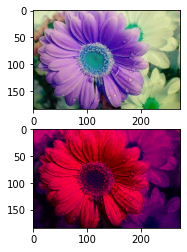

In [101]:
# PASAMOS A COMPONENTES YUV

T = np.array([[0.299, 0.587, 0.114], [-0.14713, -0.28886, 0.436], [0.615, -0.51499, -0.10001]])

imYUV = im@T
# imYUV[0] luminancia
# imYUV[1] crominancia1
# imYUV[2] crominancia2

# EQ LUMINANCIA
imYeq = ecualiza_(imYUV[...,0])

imYUVeq = np.stack((imYeq, imYUV[...,1], imYUV[...,2]), axis=2)


imRGBeq = T.
plt.subplot(211)
plt.imshow(im)
plt.subplot(212)
plt.imshow(imYUVeq)